In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn import metrics

import re
import nltk
import string
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize


import warnings
warnings.filterwarnings('ignore')

In [4]:
df_main = pd.read_csv('resume_dataset.csv')

In [5]:
df_main.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  169 non-null    object
 1   Resume    169 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB


In [7]:
df_main['Category'].unique()


array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

# Cleansing Resume Values

In [8]:
#Create a column to be a place of clean strings
df_main['cleaned_resume'] = ''

# Step 1 : Removal Unuseful Word

In [9]:
def cleanResume(text):
    
    # Removing character and not english.
    text = re.sub(r'[^a-zA-Z0-9]+', ' ', text)
    # Removing link of the message.
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https\S+', ' ', text)
    # remove domain
    text = re.sub('@\S+', ' ', text)  
    #Remove another symbols
    text = re.sub(r'[^\w]', ' ', text)
    # Remove many kind of whitespace
    text = re.sub(r'\s+', ' ', text)
    return text.lower()
    
df_main['cleaned_resume'] = df_main['Resume'].apply(cleanResume)

In [10]:
# NLTK word tokenize.
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df_main['cleaned_resume'] = df_main['cleaned_resume'].apply(word_tokenize_wrapper)

In [11]:
print('Tokenizing Result : \n') 
print(df_main['cleaned_resume'].head())
print('\n\n\n')

Tokenizing Result : 

0    [skills, programming, languages, python, panda...
1    [education, details, may, 2013, to, may, 2017,...
2    [areas, of, interest, deep, learning, control,...
3    [skills, r, python, sap, hana, tableau, sap, h...
4    [education, details, mca, ymcaust, faridabad, ...
Name: cleaned_resume, dtype: object






In [12]:
df_main[df_main['Category'] == 'Testing']['Resume'][165]
        

'â\x9d\x96 Willingness to accept the challenges. â\x9d\x96 Positive thinking. â\x9d\x96 Good learner. â\x9d\x96 Team Player. DECLARATION: I hereby declare that the above mentioned information is correct up to my knowledge and I bear the responsibility for the correctness of the above mentioned particulars. Date: / / Name: Dongare Mandakini Murlidhar Signature: Education Details \nJune 2015 Electronics and Telecommunication Engineering  Kolhapur, Maharashtra Shivaji University\nJune 2012  Education  Secondary and Higher Secondary\n B.E. Electronics and Telecommunication  Jaywant College of Engineering and ManagementTesting EngineerElectronics Engineer - Abacus Electronics Pvt LtdSkill Details \nLanguage - C, C++- Exprience - Less than 1 year months\nOperating Systems- Windows 7-8/NT/XP- Exprience - Less than 1 year monthsCompany Details \ncompany - Abacus Electronics Pvt Ltd\ndescription - Duties:\nâ\x9d\x96 Perform electronic system testing for acceptance, compliance, warranty and othe

In [13]:
#Remove stopwords
stop_words = stopwords.words('english')
print(stop_words) #print list of stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
# Manualy append additional stopword.
stop_words.extend(['skills','programming','languages', "topic", "others",
                   'of', 'details', 'machine', 'learning',  'database','visualizations',
                   "tools",  "technologies", 'education', 'description', "areas", "of", "interest",
                   "enthusiast", "industry", "project", "name", "environment", "responsibilities",
                   'personal', 'expertise', 'company', 'computer', 'activites', 'software', 
                   'strengths', 'qualification', 'additional', 'skill', 'it', 
                   'sets', 'knowledge', 'title', 'location', 'drafting', 'packages',
                   'systems', 'handle', 'roles', 'competencies', 'achievement', 'attended', 'core', 'profile', 
                   'linguistic', 'ability', 'passport', 'status', "skillset", 'clients', "proficiencies",
                   'technicalproficiencies', 'hobbies', 'date', "duties", "set", "os", "proficient", 'b', 'e', 'uit', 'work', 'works',
                   'technical', 'use', 'application', 'data', 'requirment', 'issues', 'issue', 'experience', 'jobs', 'job',
                   'experiences', 'include', 'using', 'used', 'various', 'like', 'activity', 'projects', 'create', 'exprience', 'expriences'])

# ---------------------------------------------------------------------------------------

# Convert list to dictionary.
stop_words = set(stop_words)

In [15]:
def remove_stopwords(text):
    output= [i for i in text if i not in stop_words]
    return output

#applying the function
df_main['cleaned_resume']= df_main['cleaned_resume'].apply(lambda x:remove_stopwords(x))

# Step 2 : Stemming and Lematization

In [16]:
#Stemming to get a root of every word

from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [stemmer.stem(word) for word in text]
    return stem_text

df_main['cleaned_resume']=df_main['cleaned_resume'].apply(lambda x: stemming(x))


In [17]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df_main['cleaned_resume']=df_main['cleaned_resume'].apply(lambda x:lemmatizer(x))

In [18]:
df_main['cleaned_resume']

0      [python, panda, numpi, scipi, scikit, learn, m...
1      [may, 2013, may, 2017, rgpvdata, scientistdata...
2      [deep, control, system, design, python, electr...
3      [r, python, sap, hana, tableau, sap, hana, sql...
4      [mca, ymcaust, faridabad, haryanadata, scienc,...
                             ...                        
164    [m, offic, word, basic, excel, power, point, s...
165    [willing, accept, challeng, posit, think, good...
166    [quick, learner, eager, learn, new, thing, com...
167    [m, power, point, m, offic, c, protiu, pcb, de...
168    [window, xp, 7, 8, 8, 1, 10, mysql, sql, serve...
Name: cleaned_resume, Length: 169, dtype: object

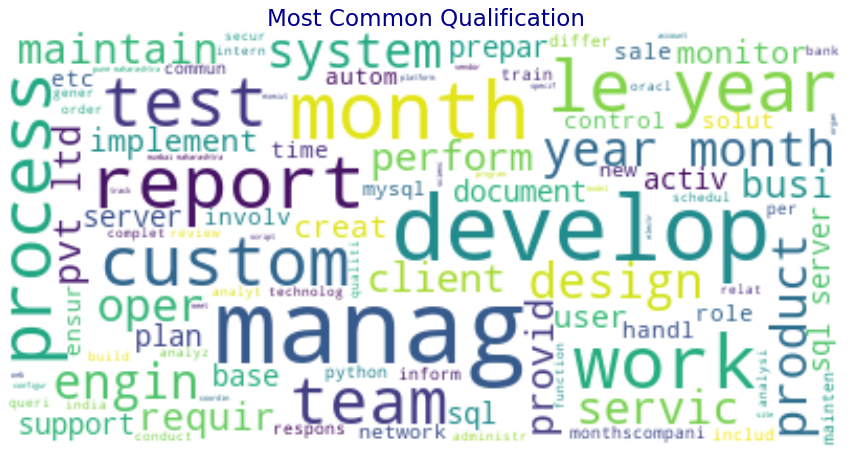

In [19]:
test = []

for i in df_main['cleaned_resume']:
    test.append(",".join(i))
    
test = [s.replace(',', ' ') for s in test]

plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = 'white').generate(str(test))

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Most Common Qualification', size = 23, color = 'darkblue')
plt.show()

# TFIDF + Machine Learning

In [20]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()

df_main['Category'] = le.fit_transform(df_main['Category'])
df_main['Category']

0       6
1       6
2       6
3       6
4       6
       ..
164    23
165    23
166    23
167    23
168    23
Name: Category, Length: 169, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


requiredText = test
requiredTarget = df_main['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

x_train,x_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


# Linear SVM

Since dataset is highdimentional, first I check if data is linear or non linear using Support Vector Machine. The score result is low (0.2) that means this data is non linear.

In [22]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo', kernel='linear')
clf.fit(x_train, y_train)

## PREDICT MODEL
y_pred = clf.predict(x_test)

print('''

    ##################################
### EVALUATION METRICS FROM SVC LINEAR ###
    ##################################

''')

print('Accuracy score :', clf.score(x_test, y_test))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive', #class should be considered "positive" for the sake of this computation.
                                           average='micro')) #“micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F,
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('                                       ')



    ##################################
### EVALUATION METRICS FROM SVC LINEAR ###
    ##################################


Accuracy score : 0.5294117647058824
Precision Score :  0.5294117647058824
Recall Score :  0.5294117647058824
F1 Score :  0.5294117647058824
                                       


In [23]:
clf = svm.SVC(decision_function_shape='ovo', kernel='rbf') #RBF kernel = non linear
clf.fit(x_train, y_train)

## PREDICT MODEL
y_pred = clf.predict(x_test)

print('''

    ######################################
### EVALUATION METRICS FROM SVM NON LINEAR ###
    ######################################

''')
print('Accuracy score :', clf.score(x_test, y_test))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive', #class should be considered "positive" for the sake of this computation.
                                           average='micro')) #“micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F,
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('                                       ')



    ######################################
### EVALUATION METRICS FROM SVM NON LINEAR ###
    ######################################


Accuracy score : 0.20588235294117646
Precision Score :  0.20588235294117646
Recall Score :  0.20588235294117646
F1 Score :  0.20588235294117646
                                       


In [33]:
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# modelnb = GaussianNB()
# clf = OneVsRestClassifier(modelnb)

clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train, y_train)
## PREDICT MODEL
y_pred = clf.predict(x_test)

print('''

    ###########################################
### EVALUATION METRICS FROM LOGISTIC REGRESSION ###
    ###########################################

''')
print('Accuracy score :', clf.score(x_test, y_test))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive', #class should be considered "positive" for the sake of this computation.
                                           average='micro')) #“micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F,
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('                        ')



    ###########################################
### EVALUATION METRICS FROM LOGISTIC REGRESSION ###
    ###########################################


Accuracy score : 0.23529411764705882
Precision Score :  0.23529411764705882
Recall Score :  0.23529411764705882
F1 Score :  0.23529411764705882
                        


In [38]:
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsOneClassifier


clf = OneVsRestClassifier(RidgeClassifier())

# clf = OneVsOneClassifier()

clf.fit(x_train, y_train)
## PREDICT MODEL
y_pred = clf.predict(x_test)

print('''

    ######################################
### EVALUATION METRICS FROM LINEAR ###
    ######################################

''')
print('Accuracy score :', clf.score(x_test, y_test))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive', #class should be considered "positive" for the sake of this computation.
                                           average='micro')) #“micro”-averaging in a multiclass setting with all labels included will produce equal precision, recall and F,
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print('                        ')



    ######################################
### EVALUATION METRICS FROM LINEAR ###
    ######################################


Accuracy score : 0.8823529411764706
Precision Score :  0.8823529411764706
Recall Score :  0.8823529411764706
F1 Score :  0.8823529411764706
                        


In [37]:
clf.coef_

array([[-0.02011847, -0.04292181, -0.01655643, ..., -0.02191307,
        -0.00526317, -0.01075472],
       [-0.00707027,  0.06966012, -0.01824226, ..., -0.03295051,
        -0.0016044 , -0.00953824],
       [-0.0120568 ,  0.05138518, -0.01699001, ..., -0.01413016,
        -0.01012445, -0.00498267],
       ...,
       [-0.01979566, -0.01321385, -0.00130928, ..., -0.01599735,
        -0.00378281,  0.07284144],
       [-0.02633622,  0.12876184, -0.03873331, ..., -0.00419072,
        -0.00721369, -0.00225875],
       [-0.00701401, -0.01822562, -0.01320328, ..., -0.01490695,
        -0.00990057, -0.00531169]])